# Food Demand Forecasting



In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Merging the datasets

df1 = pd.read_csv("data/train.csv")
df2 = pd.read_csv("data/meal_info.csv")
df3 = pd.read_csv("data/fulfilment_center_info.csv")

In [3]:
df = pd.merge(df1, df2)

In [4]:
dff = pd.merge(df, df3)

In [5]:
dff

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [6]:
dff.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5
456547,1443704,145,61,2104,581.03,582.03,0,0,27,Fish,Continental,473,77,TYPE_A,4.5


# Data Preprocessing

In [7]:
#checking for dtypes and null values if any

dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [8]:
#checking for duplicate rows

dff.duplicated().sum()

0

In [9]:
#getting some information about the columns like standard deviation,min-val,max-val,etc

dff.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [10]:
dff.meal_id.nunique()

51

In [11]:
dff.center_id.nunique()

77

In [12]:
dff.city_code.nunique()

51

# EDA

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='meal_id', ylabel='num_orders'>

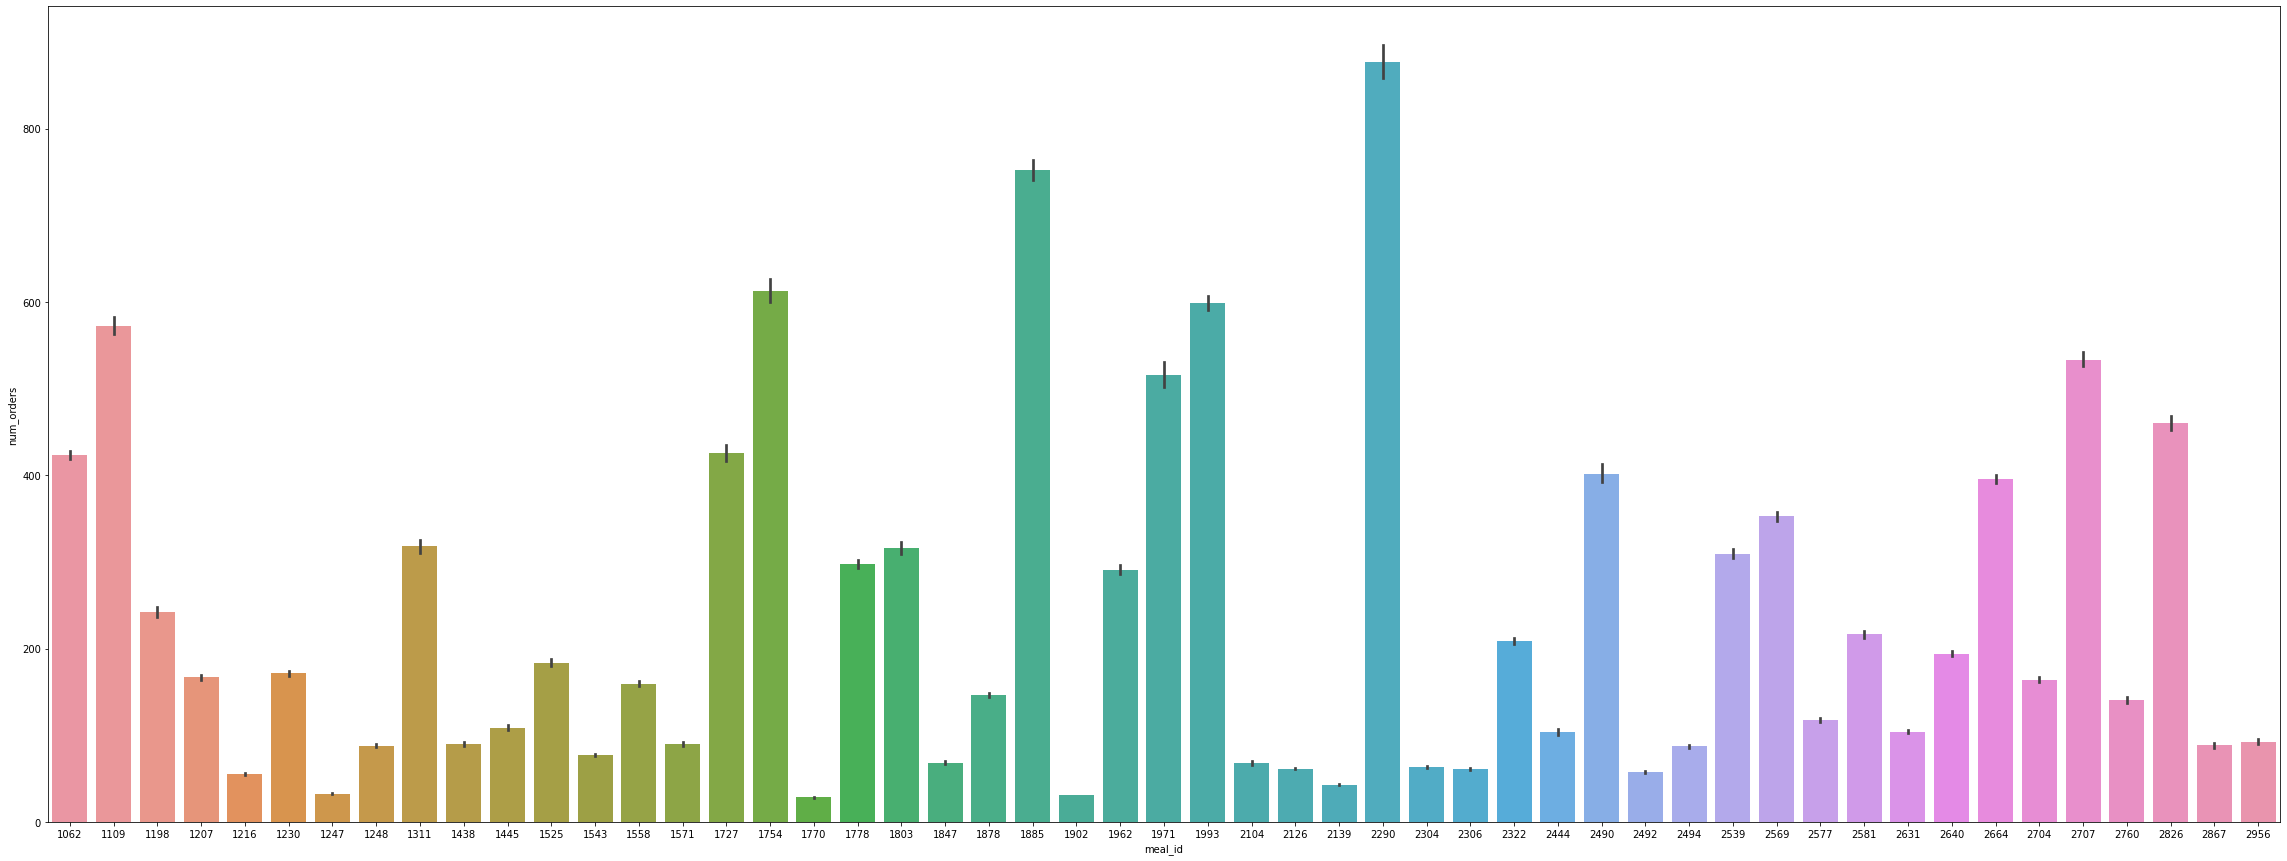

In [14]:
plt.subplots(figsize=(40,15))
sns.barplot(x= 'meal_id', y='num_orders',data=dff)

There are total 51 meal id and few of them have higher number of orders comparitively.

<AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>

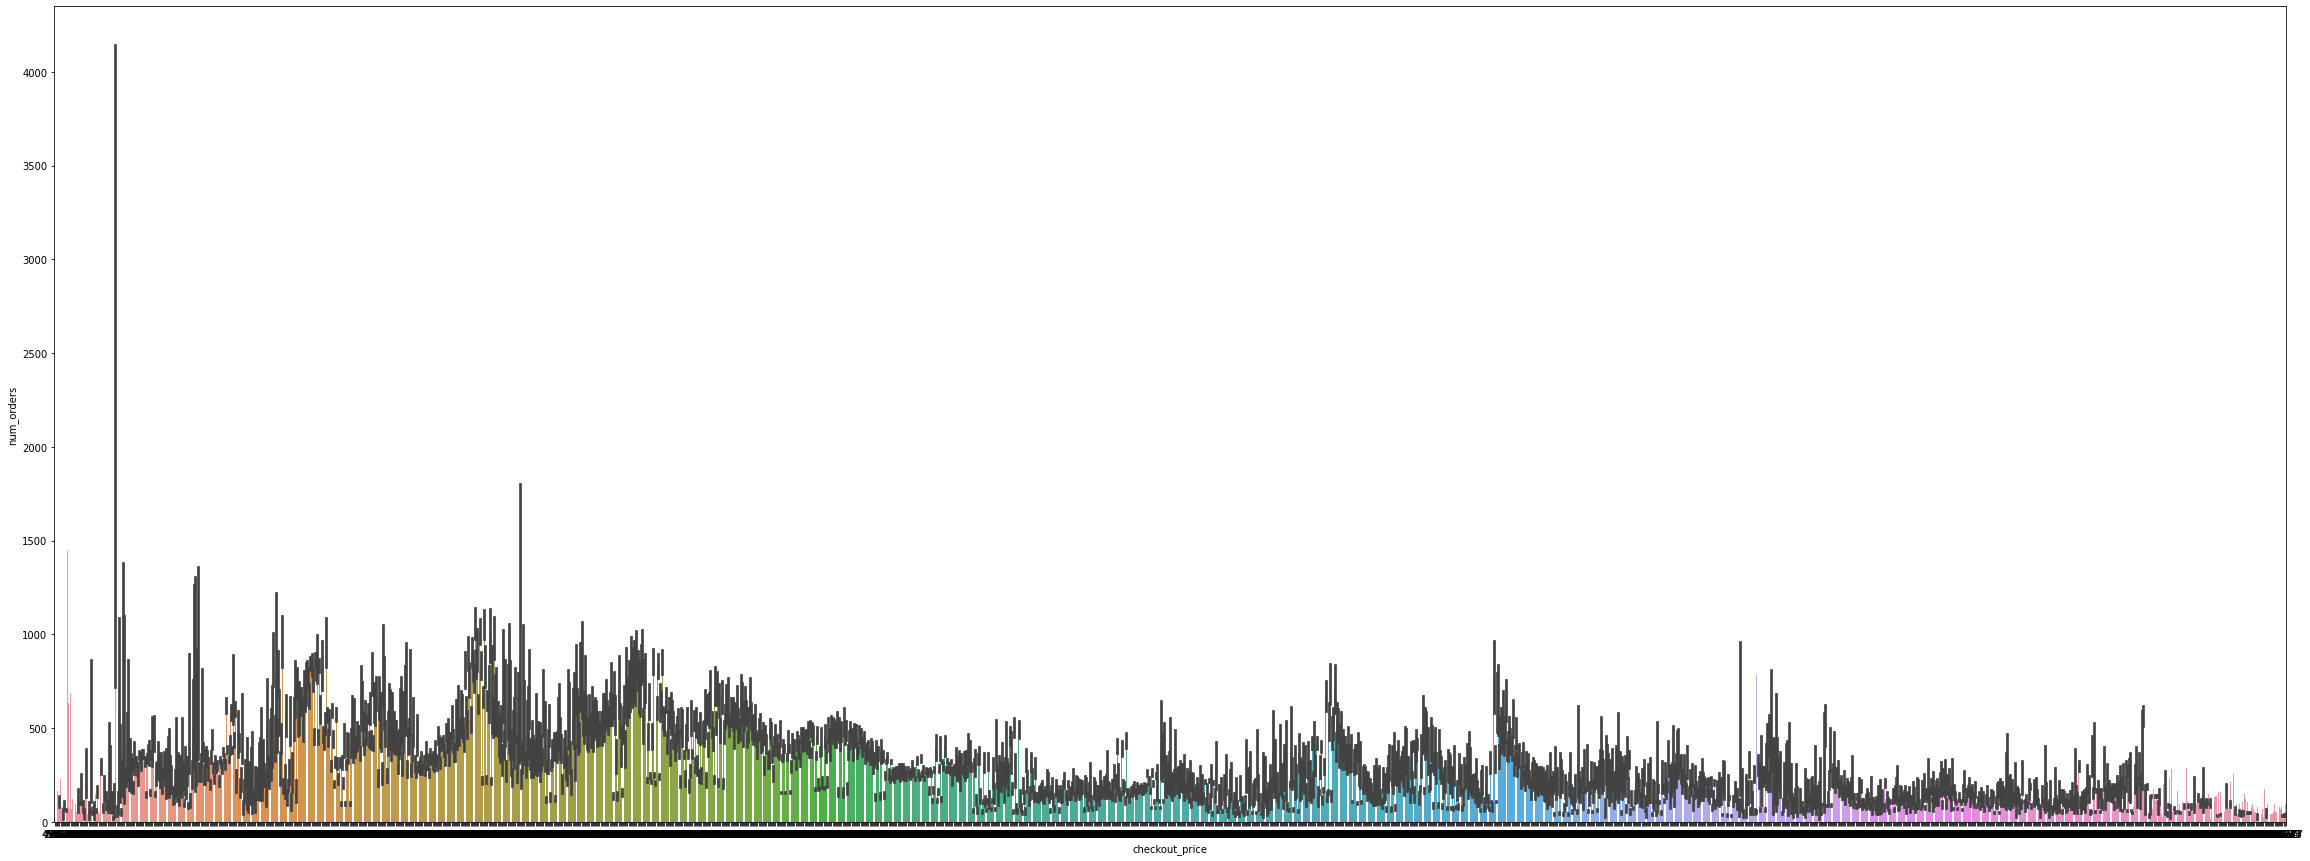

In [15]:
plt.subplots(figsize=(40,15))
sns.barplot(x= 'checkout_price', y='num_orders',data=dff)

To check how checkout price is affecting the num_orders.

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='num_orders'>

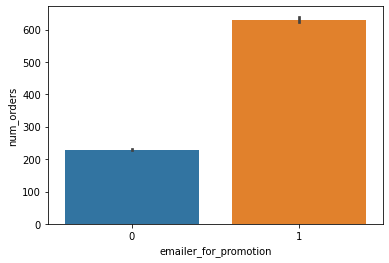

In [16]:
sns.barplot(x= 'emailer_for_promotion', y='num_orders',data=dff)

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='num_orders'>

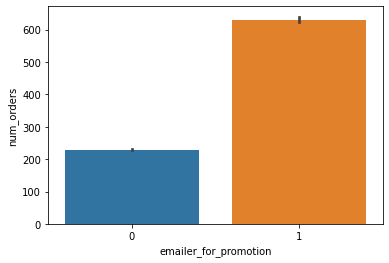

In [17]:
sns.barplot(x= 'emailer_for_promotion', y='num_orders',data=dff)

Promotions plays a vital role in the sales and thus increasing the number of orders which is even more in case of homepage promotions.

<AxesSubplot:xlabel='center_type', ylabel='num_orders'>

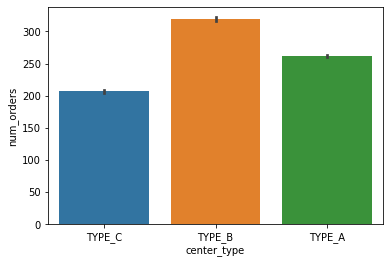

In [18]:
sns.barplot(x= 'center_type', y='num_orders',data=dff)

<AxesSubplot:ylabel='Density'>

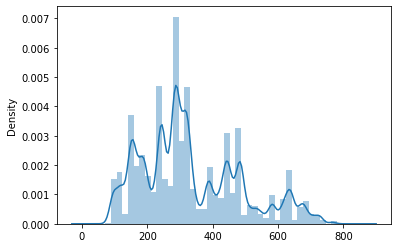

In [19]:
sns.distplot(x=dff['checkout_price'])

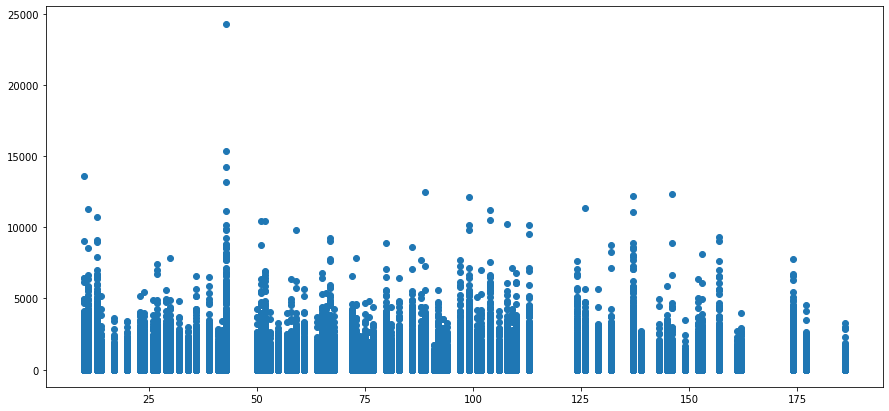

In [20]:
plt.subplots(figsize=(15,7))
plt.scatter(df['center_id'],df['num_orders'])

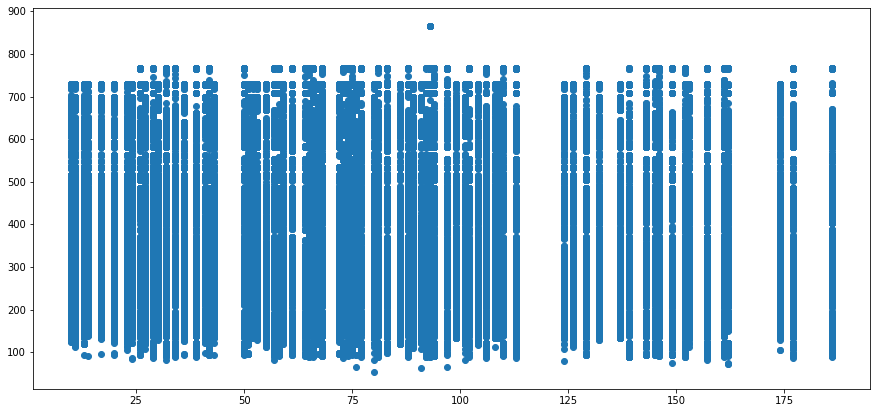

In [21]:
plt.subplots(figsize=(15,7))
plt.scatter(df['center_id'],df['base_price'])

# Outliers Treatment

<AxesSubplot:xlabel='num_orders'>

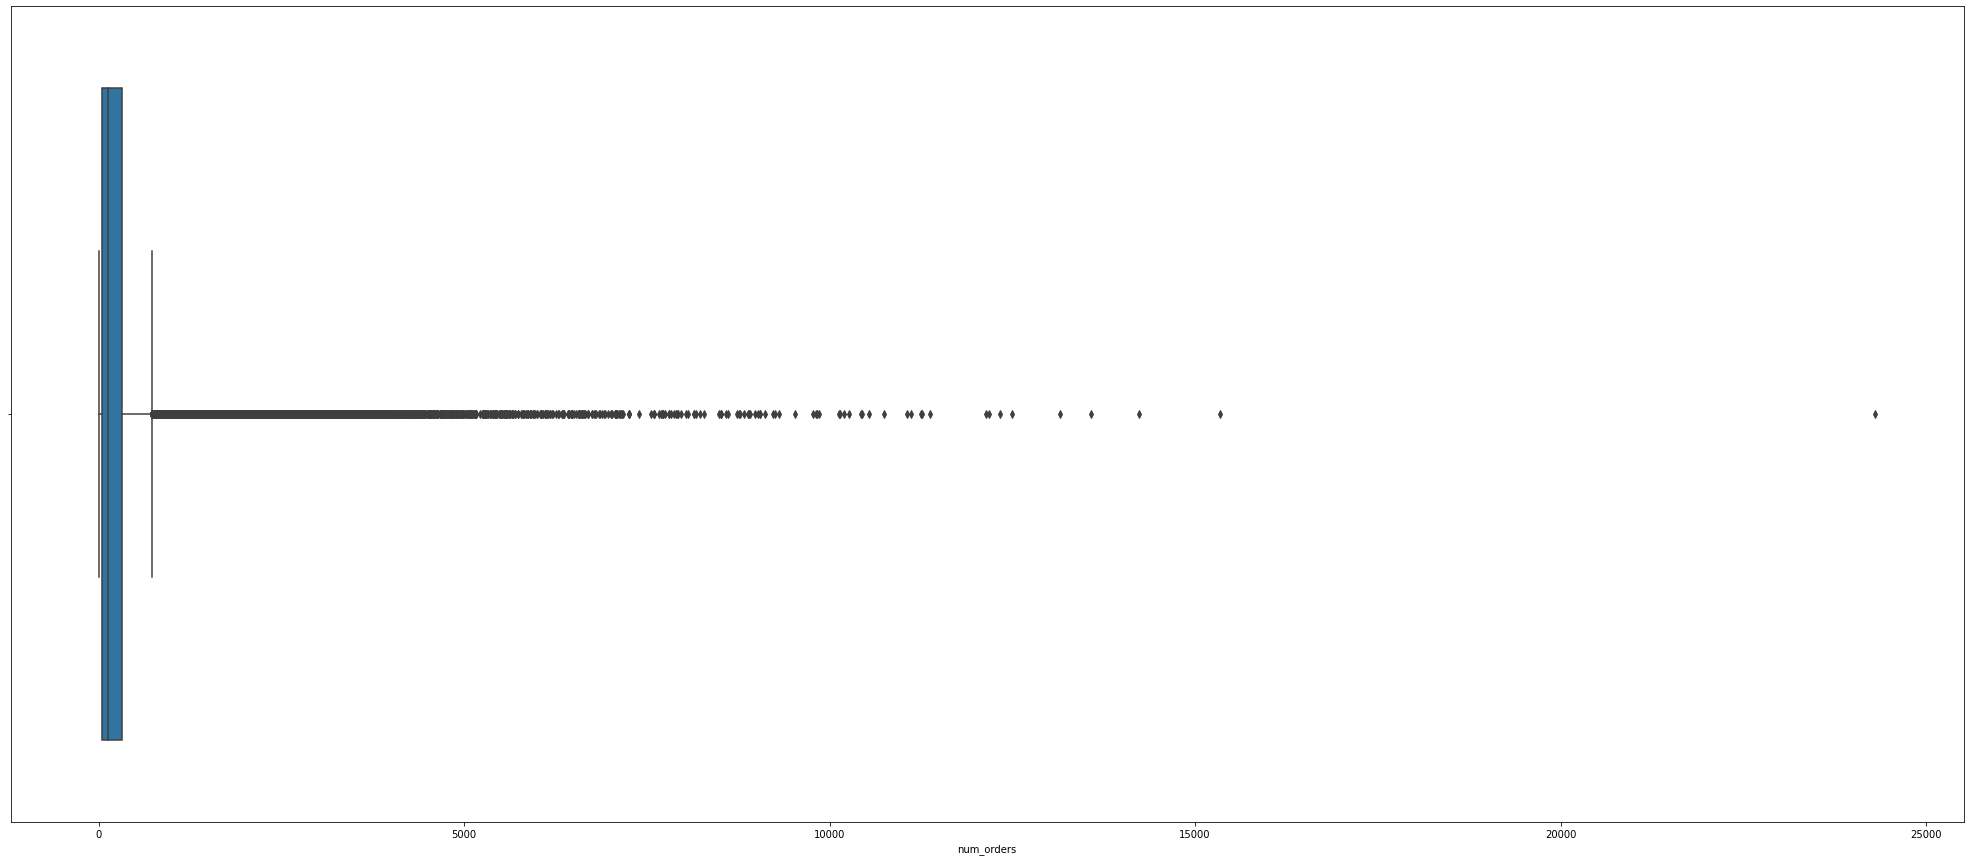

In [22]:
plt.subplots(figsize=(35,15))
sns.boxplot(dff['num_orders'])

# Using IQR to find the upper and lower bounds.

In [23]:
q1=dff.num_orders.quantile(0.25)
q3=dff.num_orders.quantile(0.75)
q1,q3

(54.0, 324.0)

In [24]:
IQR=q3-q1
IQR

270.0

In [25]:
lower_bound=q1-3*IQR
upper_bound=q3+3*IQR
lower_bound,upper_bound

(-756.0, 1134.0)

Instead of 1134.0, I have taken 9000 after checking manualy that there are only few values which are outside the continous line and also there is no value for lower bound  i.e -756.0 , So only outliers lying above the upper bound have been removed.

In [26]:
index = dff[(dff['num_orders'] >= 1134)].index
dff.drop(index, inplace=True)
           

In [27]:
dff.shape

(443180, 15)

# Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

x = dff.drop('num_orders', axis=1)
y = dff['num_orders']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, x_test.shape

((332385, 14), (110795, 14))

# Feature Engg. & Selection

In [29]:
x_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
50255,1398935,17,93,1248,93.15,261.93,0,0,Beverages,Indian,461,34,TYPE_A,3.9
126435,1151325,105,94,1248,98.00,154.26,0,0,Beverages,Indian,632,34,TYPE_C,3.6
261405,1090045,67,73,2304,563.63,562.63,0,0,Desert,Indian,576,34,TYPE_A,4.0
319767,1007352,60,29,1248,154.26,153.26,0,0,Beverages,Indian,526,34,TYPE_C,4.0
398312,1071756,111,65,2322,320.10,312.37,1,1,Beverages,Continental,602,34,TYPE_A,4.8


# Feature Engg. Approach
One hot encoding has been used here. Earlier approaches were through target encoding and label encoding which was not found effective while building model because of limited number of low correlated features. Also frequency encoding made the model to generate relatively higher values.

In [30]:
from sklearn.preprocessing import LabelEncoder
cuis_d = pd.get_dummies(x_train.cuisine, prefix='cuisine')
x_train = pd.concat([x_train,cuis_d],axis=1)

cat_d = pd.get_dummies(x_train.category, prefix='category')
x_train = pd.concat([x_train,cuis_d],axis=1)

cent_d = pd.get_dummies(x_train.center_type, prefix='center_type')
x_train = pd.concat([x_train,cent_d],axis=1)

meal_d = pd.get_dummies(x_train.meal_id, prefix='meal_id')
x_train = pd.concat([x_train,meal_d],axis=1)

homepage_featured_d = pd.get_dummies(x_train.homepage_featured, prefix='homepage_featured')
x_train = pd.concat([x_train,homepage_featured_d],axis=1)

In [31]:
##Discount column created using base price and checkout price.
x_train["Discount"]=((x_train["base_price"]-x_train["checkout_price"])/x_train["base_price"])*100

All the heatmaps can be ignored because features have been selected using model parameters and some were removed manually because of their dtypes not being numerical to be fed.

<AxesSubplot:>

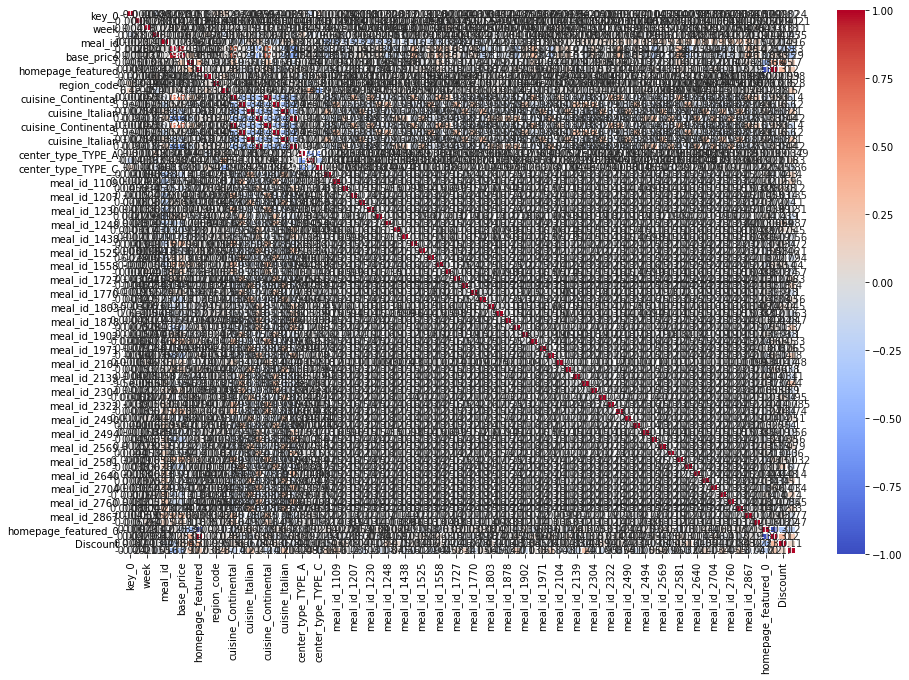

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [33]:
#Dropping columns

x_train.drop(['week','meal_id','category','cuisine','city_code','region_code','center_type','homepage_featured'],axis=1,inplace=True)

In [34]:
x_train.head()

,id,center_id,checkout_price,base_price,emailer_for_promotion,op_area,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,...,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,homepage_featured_0,homepage_featured_1,Discount
50255,1398935,93,93.15,261.93,0,3.9,0,1,0,0,...,0,0,0,0,0,0,0,1,0,64.437063
126435,1151325,94,98.00,154.26,0,3.6,0,1,0,0,...,0,0,0,0,0,0,0,1,0,36.470893
261405,1090045,73,563.63,562.63,0,4.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,-0.177737
319767,1007352,29,154.26,153.26,0,4.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,-0.652486
398312,1071756,65,320.10,312.37,1,4.8,1,0,0,0,...,0,0,0,0,0,0,0,0,1,-2.474629


In [35]:
#Creating same features for test data

cuis_d = pd.get_dummies(x_test.cuisine, prefix='cuisine')
x_test = pd.concat([x_test,cuis_d],axis=1)

cat_d = pd.get_dummies(x_test.category, prefix='category')
x_test = pd.concat([x_test,cuis_d],axis=1)

cent_d = pd.get_dummies(x_test.center_type, prefix='center_type')
x_test = pd.concat([x_test,cent_d],axis=1)

meal_d = pd.get_dummies(x_test.meal_id, prefix='meal_id')
x_test = pd.concat([x_test,meal_d],axis=1)

homepage_featured_d = pd.get_dummies(x_test.homepage_featured, prefix='homepage_featured')
x_test = pd.concat([x_test,homepage_featured_d],axis=1)

In [36]:
x_test["Discount"]=((x_test["base_price"]-x_test["checkout_price"])/x_test["base_price"])*100

<AxesSubplot:>

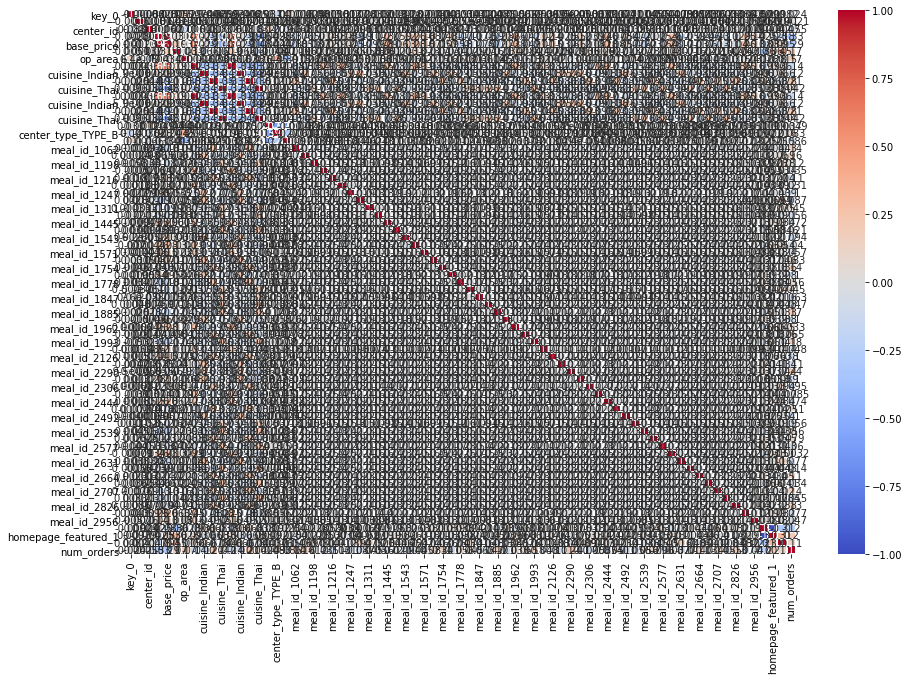

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [38]:
x_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,...,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,homepage_featured_0,homepage_featured_1,Discount
308115,1193585,66,67,1971,287.15,286.15,0,0,Sandwich,Italian,...,0,0,0,0,0,0,0,1,0,-0.349467
214203,1053170,86,129,1902,445.23,446.23,0,0,Biryani,Indian,...,0,0,0,0,0,0,0,1,0,0.224100
100806,1411766,45,97,2569,327.89,328.89,0,0,Salad,Italian,...,0,0,0,0,0,0,0,1,0,0.304053
166615,1141967,109,36,2322,514.13,515.13,0,0,Beverages,Continental,...,0,0,0,0,0,0,0,1,0,0.194126
361383,1030142,2,143,2826,327.86,328.86,0,0,Sandwich,Italian,...,0,0,0,0,1,0,0,1,0,0.304081


In [39]:
x_test.drop(['week','meal_id','category','cuisine','city_code','region_code','center_type','homepage_featured'],axis=1,inplace=True)

In [40]:
x_test.shape

(110795, 71)

In [41]:
x_train.shape

(332385, 71)

# RandomForestRegressor
Since its a regression problem, I tried some regression model and found Random Forest best-siuited for training.

Other models like XGB, Decision Tree were used. The rmsle scores were really high and by trying different models it came down from ~95  to  ~52.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
rfr = RandomForestRegressor(n_estimators = 100,max_features=40, random_state = 0)
rfr.fit(x_train,y_train)

# changed the values in n-estimators and kept random state as 0 to get the best result. max features for each split is 40.

RandomForestRegressor(max_features=40, random_state=0)

In [43]:
y_pred = rfr.predict(x_test)
y_pred

array([352.42,  35.6 , 439.61, ...,  91.86,  70.07, 918.32])

In [44]:
y_test

308115    568
214203     15
100806    620
166615     55
361383    107
         ... 
218801    271
211113    771
36896      82
99951      81
147277    661
Name: num_orders, Length: 110795, dtype: int64

# RMSLE

In [45]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_pred ))

0.5255733383028847

# 0.5255733383028847*100


In [46]:
###Loading and merging the main test dataset.

In [47]:
df4 = pd.read_csv('test_Q.csv')
df5 = pd.merge(df4, df2)
dft = pd.merge(df5,df3) 
dft.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [48]:
dft.shape

(32573, 14)

In [49]:
cuis_d = pd.get_dummies(dft.cuisine, prefix='cuisine')
dft = pd.concat([dft,cuis_d],axis=1)

cat_d = pd.get_dummies(dft.category, prefix='category')
dft = pd.concat([dft,cuis_d],axis=1)

cent_d = pd.get_dummies(dft.center_type, prefix='center_type')
dft = pd.concat([dft,cent_d],axis=1)

meal_d = pd.get_dummies(dft.meal_id, prefix='meal_id')
dft = pd.concat([dft,meal_d],axis=1)

homepage_featured_d = pd.get_dummies(dft.homepage_featured, prefix='homepage_featured')
dft = pd.concat([dft,homepage_featured_d],axis=1)

In [50]:
dft["Discount"]=((dft["base_price"]-dft["checkout_price"])/dft["base_price"])*100

In [51]:
dft.drop(['week','meal_id','category','cuisine','city_code','region_code','center_type','homepage_featured'],axis=1,inplace=True)

In [52]:
dft.shape

(32573, 71)

Predicting the num_orders for main test data.

In [53]:
y_preddd = rfr.predict(dft)

In [54]:
df_final = pd.read_csv('sample.csv')
df_final['num_orders'] = y_preddd
df_final['id'] = dft['id']
df_final.to_csv('samplerandomforest.csv')

In [55]:
df_final

,id,num_orders
0,1028232,133.87
1,1262649,154.92
2,1453211,94.84
3,1262599,165.96
4,1495848,101.87
...,...,...
32568,1412025,67.66
32569,1287019,61.97
32570,1396176,29.54
32571,1331977,29.03
